In [1]:
from datasets import load_dataset
data_files={"train": "TinyStoriesV2-GPT4-train.txt", "test": "TinyStoriesV2-GPT4-valid.txt"}
ds = load_dataset("roneneldan/TinyStories",data_files=data_files)

/n/home07/jchooi/.conda/envs/olmo2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# we can access the data by lines
# stories are separated by <|endoftext|>

ds["train"][0:10]["text"]

['',
 'Once upon a time there was a little boy named Ben. Ben loved to explore the world around him. He saw many amazing things, like beautiful vases that were on display in a store. One day, Ben was walking through the store when he came across a very special vase. When Ben saw it he was amazed!  ',
 'He said, “Wow, that is a really amazing vase! Can I buy it?” ',
 'The shopkeeper smiled and said, “Of course you can. You can take it home and show all your friends how amazing it is!”',
 "So Ben took the vase home and he was so proud of it! He called his friends over and showed them the amazing vase. All his friends thought the vase was beautiful and couldn't believe how lucky Ben was. ",
 "And that's how Ben found an amazing vase in the store!",
 '<|endoftext|>',
 'Once upon a time, there was a reliable otter named Ollie. He lived in a river with his family. They all loved to play and swim together.',
 'One day, Ollie\'s mom said, "Ollie, hurry and get some fish for dinner!" Ollie swam

In [67]:
# combine stories
all_text = '\n'.join(ds["train"][:]["text"])
stories = all_text.split("\n<|endoftext|>\n")

In [68]:
# total number of stories
len(stories)

2717700

In [69]:
# total number of non-empty stories
len([story for story in stories if story])

2717495

In [70]:
# share of non-empty stories
2717495/2717700

0.9999245685690106

In [71]:
# make sure every story is non-empty, and add the EOS token
stories = [story + "<|endoftext|>" for story in stories if story]

In [72]:
from typing import List
import re

def explode_into_words(story: str) -> List[str]:
    # explode a story into a list of words and single-char non-alphanumerics (e.g. punctuations)
    return re.findall(r'\<\|endoftext\|\>|\w+|\W', story)

In [73]:
# count the number of unique words
from tqdm import tqdm

unique_words_cnt = dict()

for story in tqdm(stories):
     words = explode_into_words(story)
     for word in words:
        word = word.lower()
        if word in unique_words_cnt:
            unique_words_cnt[word] += 1
        else:
            unique_words_cnt[word] = 1

100%|██████████| 2717495/2717495 [05:33<00:00, 8157.84it/s]


In [74]:
# sort the dict so most frequent words first
unique_words_cnt = dict(sorted(unique_words_cnt.items(), key=lambda item: item[1], reverse=True))

In [75]:
# save unique words
import json

with open("unique_words_tinystories.json", "w") as json_file:
    json.dump(unique_words_cnt, json_file)

In [76]:
# make the histogram of # stories vs # top words

# convert this to a dict (i.e. map) for O(log n) access
word_rank_dict = dict()
for rank, word in enumerate(unique_words_cnt.keys()):
    word_rank_dict[word] = rank

In [77]:
# for each story, find its bottleneck
story_bottleneck = [0] * len(stories)
for story_id, story in enumerate(tqdm(stories)):
    words = explode_into_words(story)
    words = [word.lower() for word in words]
    word_ranks = [word_rank_dict[word] for word in words]
    story_bottleneck[story_id] = max(word_ranks)

2717495it [03:51, 11735.82it/s]


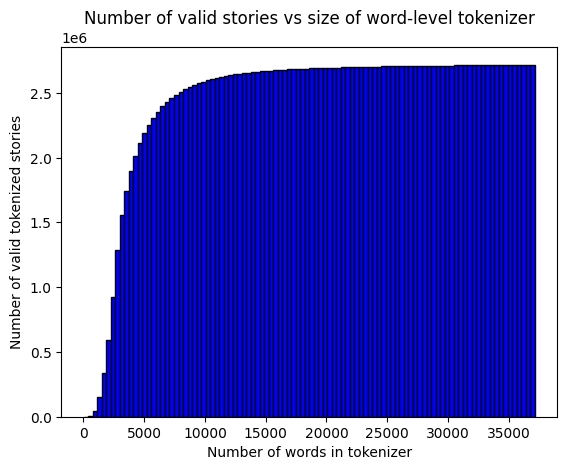

In [78]:
# we can now plot the histogram
import matplotlib.pyplot as plt

# Plotting the cumulative histogram
plt.hist(story_bottleneck, bins=100, cumulative=True, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of words in tokenizer')
plt.ylabel('Number of valid tokenized stories')
plt.title('Number of valid stories vs size of word-level tokenizer')

# Display the plot
plt.savefig("valid_stories_of_word_level_tokenizer.png")
plt.show()

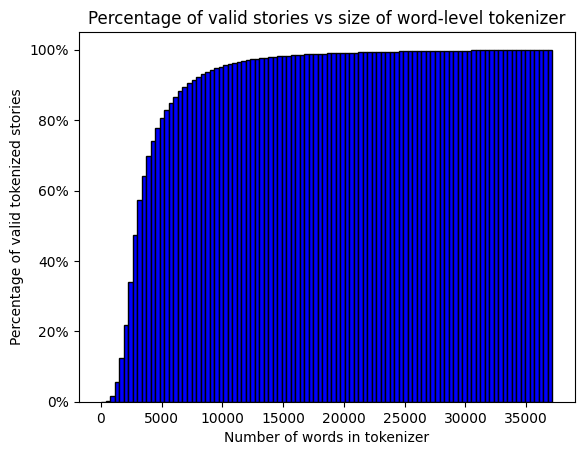

In [79]:
# Plotting the cumulative histogram with percentages
plt.hist(story_bottleneck, bins=100, cumulative=True, density=True, color='blue', edgecolor='black')

# Convert y-axis to percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Adding labels and title
plt.xlabel('Number of words in tokenizer')
plt.ylabel('Percentage of valid tokenized stories')
plt.title('Percentage of valid stories vs size of word-level tokenizer')

# Display the plot
plt.savefig("percent_valid_stories_of_word_level_tokenizer.png")
plt.show()

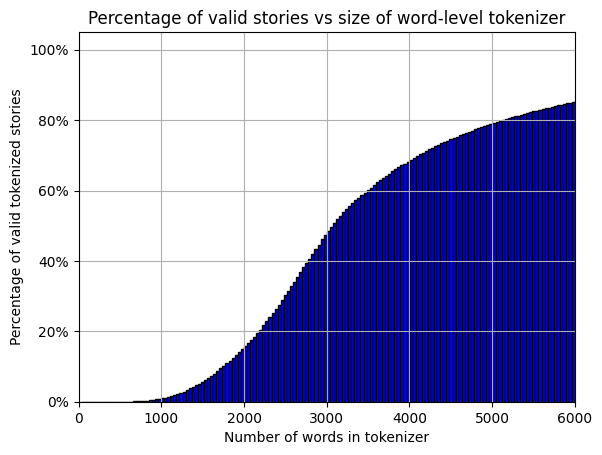

In [80]:
# let's zoom into 6000 and below

# Plotting the cumulative histogram with percentages
plt.hist(story_bottleneck, bins=1000, cumulative=True, density=True, color='blue', edgecolor='black')

# Convert y-axis to percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Adding labels and title
plt.xlabel('Number of words in tokenizer')
plt.ylabel('Percentage of valid tokenized stories')
plt.title('Percentage of valid stories vs size of word-level tokenizer')

# Set x-axis limit to 6000
plt.xlim(0, 6000)

# Adding grid lines
plt.grid(True)

# Display the plot
plt.savefig("6k_percent_valid_stories_of_word_level_tokenizer.png")
plt.show()

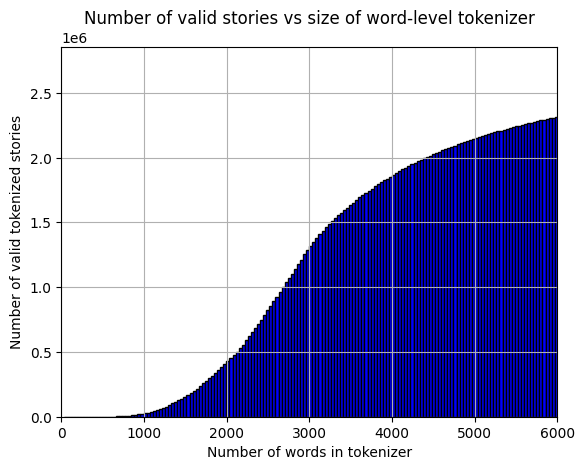

In [81]:
# let's see this in absolute number of stories

# Plotting the cumulative histogram with percentages
plt.hist(story_bottleneck, bins=1000, cumulative=True, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of words in tokenizer')
plt.ylabel('Number of valid tokenized stories')
plt.title('Number of valid stories vs size of word-level tokenizer')

# Set x-axis limit to 6000
plt.xlim(0, 6000)

# Adding grid lines
plt.grid(True)

# Display the plot
plt.savefig("6k_valid_stories_of_word_level_tokenizer.png")
plt.show()

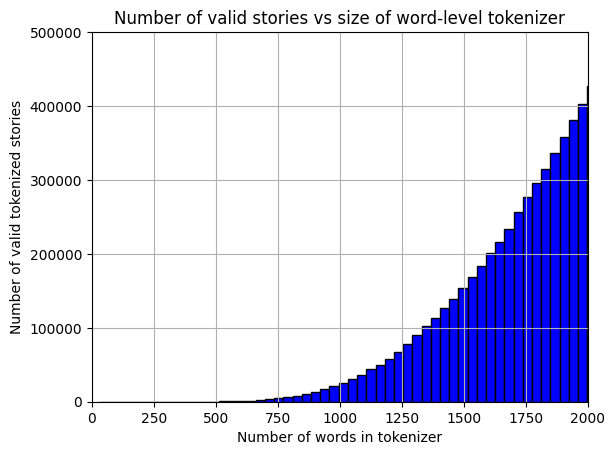

In [82]:
# let's go under 2000

# Plotting the cumulative histogram with percentages
plt.hist(story_bottleneck, bins=1000, cumulative=True, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of words in tokenizer')
plt.ylabel('Number of valid tokenized stories')
plt.title('Number of valid stories vs size of word-level tokenizer')

# Set x-axis limit to 2000
plt.xlim(0, 2000)

# Set y-axis limit to 500,000
plt.ylim(0, 500000)

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

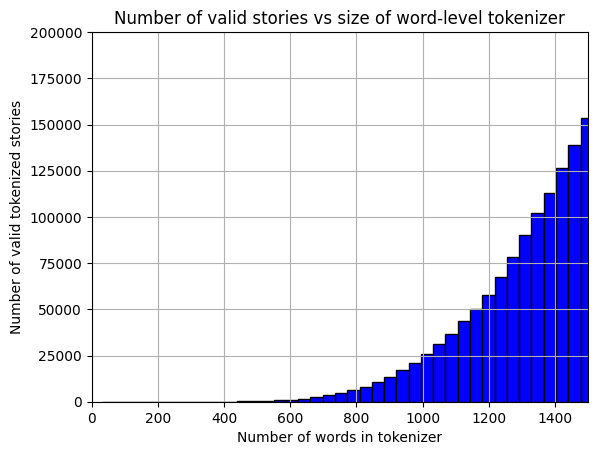

In [83]:
# let's go under 1500

# Plotting the cumulative histogram with percentages
plt.hist(story_bottleneck, bins=1000, cumulative=True, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of words in tokenizer')
plt.ylabel('Number of valid tokenized stories')
plt.title('Number of valid stories vs size of word-level tokenizer')

# Set x-axis limit to 1500
plt.xlim(0, 1500)

# Set y-axis limit to 200,000
plt.ylim(0, 200000)

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

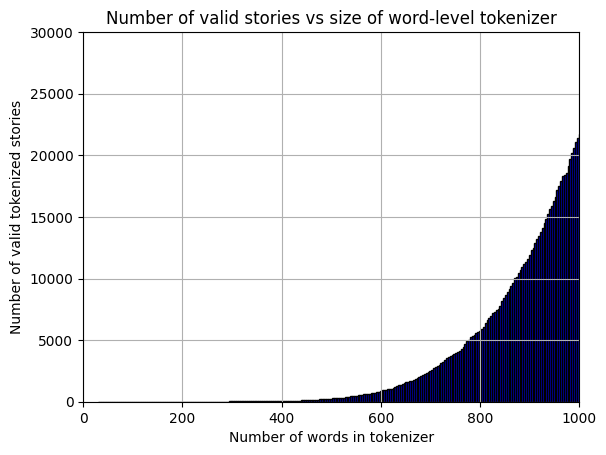

In [84]:
# let's go under 1000

# Plotting the cumulative histogram with percentages
plt.hist(story_bottleneck, bins=10000, cumulative=True, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of words in tokenizer')
plt.ylabel('Number of valid tokenized stories')
plt.title('Number of valid stories vs size of word-level tokenizer')

# Set x-axis limit to 1000
plt.xlim(0, 1000)

# Set y-axis limit to 30,000
plt.ylim(0, 30000)

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

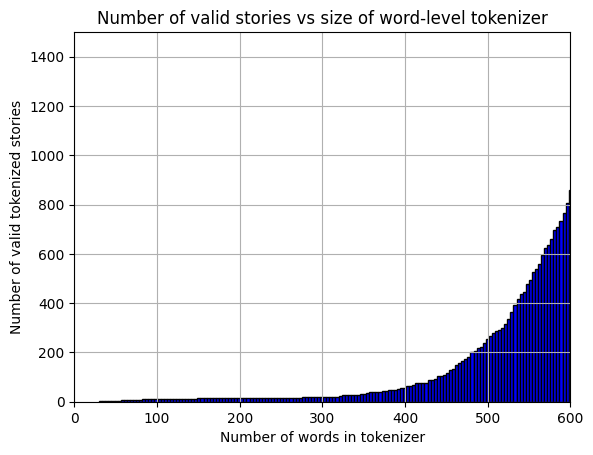

In [85]:
# let's go under 1000

# Plotting the cumulative histogram with percentages
plt.hist(story_bottleneck, bins=10000, cumulative=True, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of words in tokenizer')
plt.ylabel('Number of valid tokenized stories')
plt.title('Number of valid stories vs size of word-level tokenizer')

# Set x-axis limit to 600
plt.xlim(0, 600)

# Set y-axis limit to 1,500
plt.ylim(0, 1500)

# Adding grid lines
plt.grid(True)

# Display the plot
plt.savefig("600w_valid_stories_of_word_level_tokenizer.png")
plt.show()

In [86]:
# get the stories with <= 600 top words
# write them to a file

filename = "/n/holyscratch01/sham_lab/summer_2024/datasets/tiny-600.txt"
cutoff = 600

with open(filename, 'w') as f:
    for id, bottleneck in enumerate(story_bottleneck):
        if bottleneck <= cutoff:
            f.write(stories[id] + '\n')

In [3]:
# seems like there are lines where the only entry is endoftext
for id, bottleneck in enumerate(story_bottleneck):
    if bottleneck <= 300:
        print(stories[id])

NameError: name 'story_bottleneck' is not defined

In [5]:
# possibly the data generation sometimes refused to answer.
# since we are operating at <=600 token, these stories might make up a lot of our data
# let's clean them up

# usually, these are the shortest stories
for story in stories:
    if len(story) < 50:
        print(story)

NameError: name 'stories' is not defined

In [ ]:
# another heuristic is that these stories don't end on a period

def end_on_period(story):
    ending = ".<|endoftext|>"
    return story[-len(ending)] == ending


for story in stories:
    if not end_on_period(story):
        print(story)


Once upon a time there was a little boy named Ben. Ben loved to explore the world around him. He saw many amazing things, like beautiful vases that were on display in a store. One day, Ben was walking through the store when he came across a very special vase. When Ben saw it he was amazed!  
He said, “Wow, that is a really amazing vase! Can I buy it?” 
The shopkeeper smiled and said, “Of course you can. You can take it home and show all your friends how amazing it is!”
So Ben took the vase home and he was so proud of it! He called his friends over and showed them the amazing vase. All his friends thought the vase was beautiful and couldn't believe how lucky Ben was. 
And that's how Ben found an amazing vase in the store!<|endoftext|>
Once upon a time, there was a reliable otter named Ollie. He lived in a river with his family. They all loved to play and swim together.
One day, Ollie's mom said, "Ollie, hurry and get some fish for dinner!" Ollie swam fast to catch fish. He saw his frie

In [ ]:
# let's remove them and count how many we have left

cleaned_stories = [story for story in stories if end_on_period(story) and len(story)>=50]
print(f"Number of stories: {len(stories)}")
print(f"Number of cleaned stories: {len(cleaned_stories)}")
print(f"Percentage of cleaned stories: {len(cleaned_stories)/len(stories)*100}%")

In [ ]:
# get the bottlenecks too

cleaned_story_bottlenecks = [story_bottleneck[id] for id,story in enumerate(stories) if end_on_period(story) and len(story)>=50]

In [ ]:
# let's get the clean stories that only uses the top 600 words
cleaned_simple_stories = [cleaned_stories[id] for id in range(len(cleaned_stories)) if cleaned_story_bottlenecks]